TUGAS BESAR DATA MINING 

NAMA : SYA RAIHAN HEGGI 

NIM : 1301184219

KELAS : IF-41-GAB01

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sn
import numpy as np
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.model_selection import train_test_split

In [3]:
df_x = pd.read_csv("processed_train.csv",usecols=["trustLevel","totalScanTimeInSeconds","lineItemVoids","grandTotal"])
df_y = pd.read_csv("processed_train.csv",usecols=['fraud'])

In [4]:
df_x.shape

(240, 4)

## SPLIT DATASET 

In [5]:
X_train,X_test,y_train,y_test = train_test_split(df_x,df_y,test_size=0.30,random_state=5)

## BUAT KLASIFIER

In [6]:
classifier = DecisionTreeClassifier(max_depth=4)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

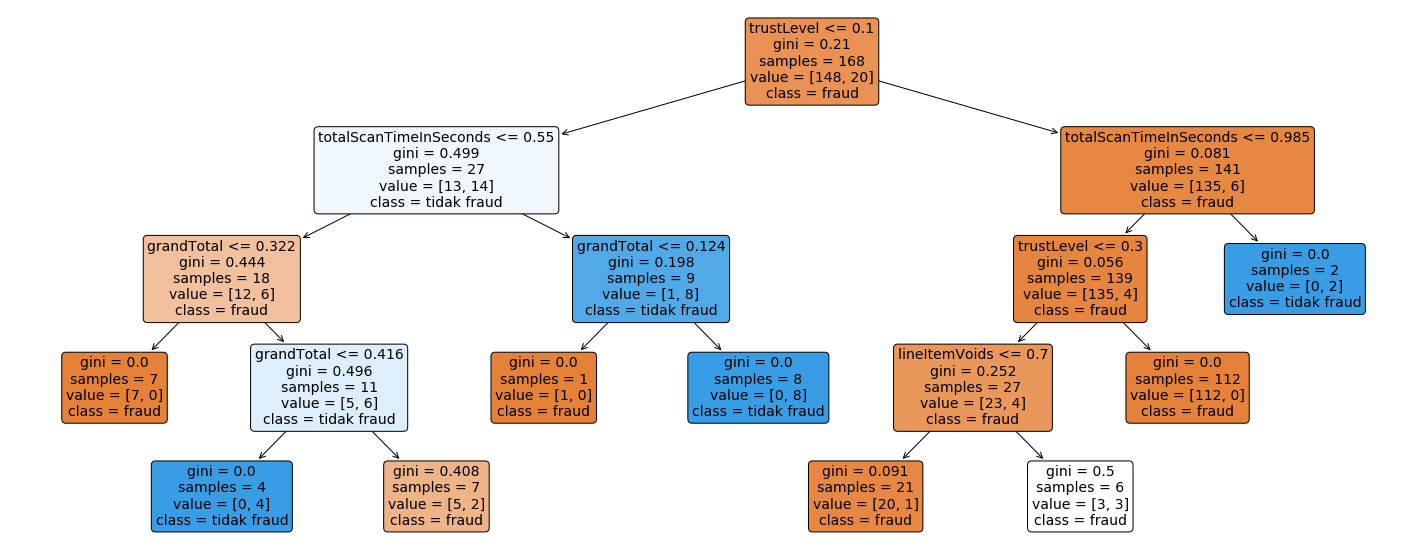

In [7]:
plt.figure(figsize=(25,10))
a = tree.plot_tree(classifier, 
              feature_names=X_train.columns, 
              class_names=['fraud','tidak fraud'],
              filled=True, 
              rounded=True, 
              fontsize=14)

## Buat Prediksi 

In [8]:
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

## DATA TRAINING

In [9]:
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))
print("Accuracy:",accuracy_score(y_train, y_pred_train)*100)

[[148   0]
 [  6  14]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       148
           1       1.00      0.70      0.82        20

    accuracy                           0.96       168
   macro avg       0.98      0.85      0.90       168
weighted avg       0.97      0.96      0.96       168

Accuracy: 96.42857142857143


## DATA VALIDASI

In [10]:
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))
print("Accuracy:",accuracy_score(y_test, y_pred_test)*100)

[[63  3]
 [ 3  3]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        66
           1       0.50      0.50      0.50         6

    accuracy                           0.92        72
   macro avg       0.73      0.73      0.73        72
weighted avg       0.92      0.92      0.92        72

Accuracy: 91.66666666666666


# LOAD DATASET TEST

In [11]:
df_test = pd.read_csv("test.csv", sep="|", usecols=["trustLevel","totalScanTimeInSeconds","lineItemVoids","grandTotal"])
df_realclass = pd.read_csv("DMC-2019-realclass.csv")
df_test.head()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids
0,4,467,88.48,4
1,3,1004,58.99,7
2,1,162,14.00,4
3,5,532,84.79,9
4,5,890,42.16,4


In [12]:
from sklearn.preprocessing import MinMaxScaler
normalize = MinMaxScaler()
d = normalize.fit_transform(df_test[df_test.columns[:9]])
df_test = pd.DataFrame(d, columns=["trustLevel","totalScanTimeInSeconds","lineItemVoids","grandTotal"])

## MAKING PREDICTION 

In [13]:
y_pred_testing = classifier.predict(df_test)

## EVALUATION 

In [14]:
print(confusion_matrix(df_realclass, y_pred_testing))
print(classification_report(df_realclass, y_pred_testing))
print("Accuracy:",accuracy_score(df_realclass, y_pred_testing)*100)

[[443695  30699]
 [ 13067  10660]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.95    474394
           1       0.26      0.45      0.33     23727

    accuracy                           0.91    498121
   macro avg       0.61      0.69      0.64    498121
weighted avg       0.94      0.91      0.92    498121

Accuracy: 91.21378139046537


## VISUALIZE 

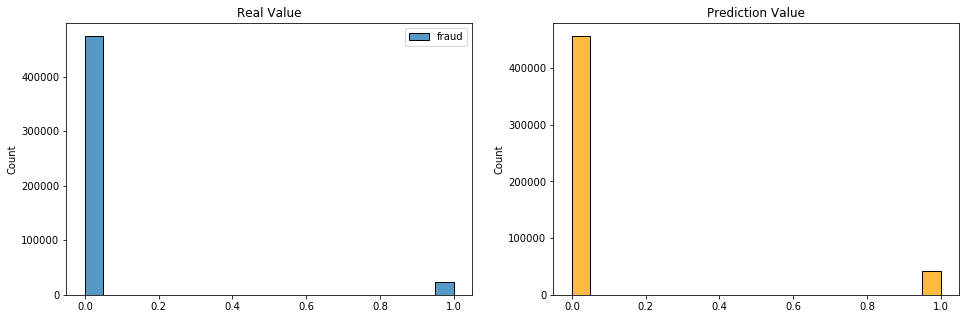

In [15]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.title("Real Value")
sn.histplot(df_realclass)
plt.subplot(1,2,2)
plt.title("Prediction Value")
sn.histplot(y_pred_testing, color="orange")

# PREPARE RESULT 

In [16]:
df_test = pd.read_csv("test.csv",sep="|")
df_test["fraud"] = pd.DataFrame(y_pred_testing)
df_test

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
0,4,467,88.48,4,8,4,0.014989,0.189465,0.571429,0
1,3,1004,58.99,7,6,1,0.026892,0.058755,0.259259,0
2,1,162,14.00,4,5,4,0.006173,0.086420,4.000000,1
3,5,532,84.79,9,3,4,0.026316,0.159380,0.642857,0
4,5,890,42.16,4,0,0,0.021348,0.047371,0.210526,0
...,...,...,...,...,...,...,...,...,...,...
498116,4,783,59.10,2,2,0,0.012771,0.075479,0.200000,0
498117,1,278,98.90,9,5,4,0.050360,0.355755,0.642857,0
498118,3,300,5.41,6,6,4,0.030000,0.018033,0.666667,0
498119,2,1524,33.97,2,5,3,0.005906,0.022290,0.222222,0


# INTERPRETATION 

In [29]:
color=['blue','orange']
data = df_test.sample(n=20000)
data.loc[data['fraud']== 0 ,'color'] = "blue"
data.loc[data['fraud']== 1 ,'color'] = "red"

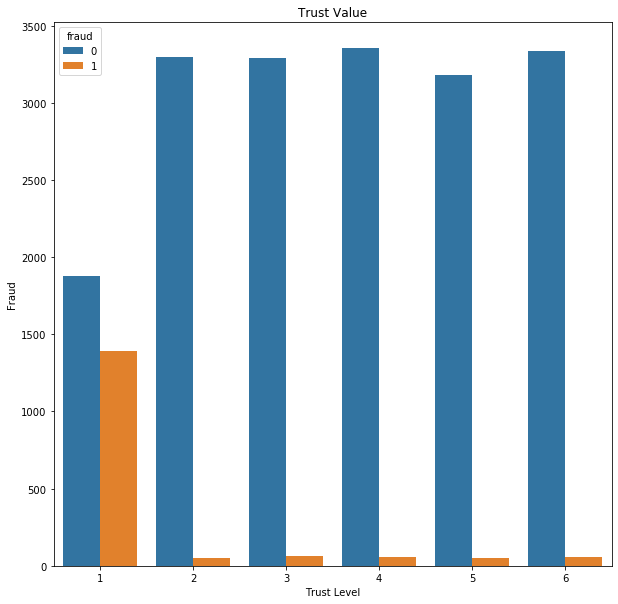

In [36]:
plt.figure(figsize=(10,10))
plt.title("Trust Value")
sn.countplot(x=data["trustLevel"], hue=data["fraud"], data=data)
plt.xlabel('Trust Level')
plt.ylabel('Fraud')
plt.show()

# SAVE DATA 

In [28]:
df_test.to_csv("Final_Prediction_Decision_Tree.csv")